Trend: There is a significant upward or downward trend in the sales data over time. This could indicate a growing or declining market.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


In [13]:
data_product_A = pd.read_excel(r'E:\Internships\Infospring\_Demand_Forecasting_Retailer\ProductA.xlsx')
data_google_clicks = pd.read_excel(r'E:\Internships\Infospring\_Demand_Forecasting_Retailer\ProductA_google_clicks.xlsx')
data_facebook_clicks = pd.read_excel(r'E:\Internships\Infospring\_Demand_Forecasting_Retailer\ProductA_fb_impressions.xlsx')
merged_df = pd.merge(data_product_A, data_google_clicks, on='Day Index')
product_clicks_impression = pd.merge(merged_df, data_facebook_clicks, on='Day Index')
product_clicks_impression

,Day Index,Quantity,Clicks,Impressions
0,2021-12-01,14,445,620
1,2021-12-02,10,433,890
2,2021-12-03,13,424,851
3,2021-12-04,22,427,881
4,2021-12-05,33,451,678
...,...,...,...,...
207,2022-06-26,13,114,1218
208,2022-06-27,16,106,1311
209,2022-06-28,13,109,885
210,2022-06-29,16,60,1000


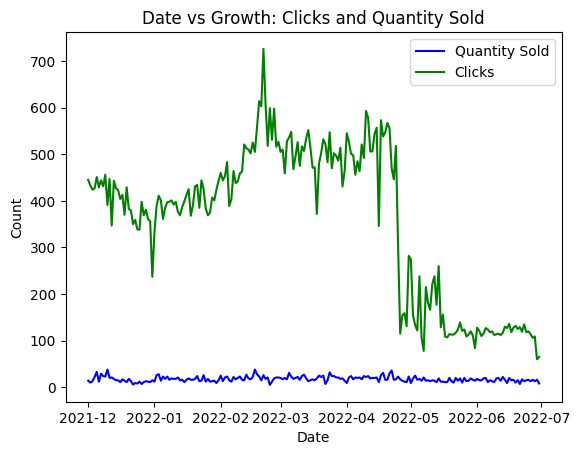

In [14]:
## Plot Quantity Vs Clicks
plt.plot(product_clicks_impression['Day Index'], product_clicks_impression['Quantity'],color='blue', label='Quantity Sold')
plt.plot(product_clicks_impression['Day Index'], product_clicks_impression['Clicks'],color='green', label='Clicks')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Date vs Growth: Clicks and Quantity Sold')
plt.legend()
plt.show()

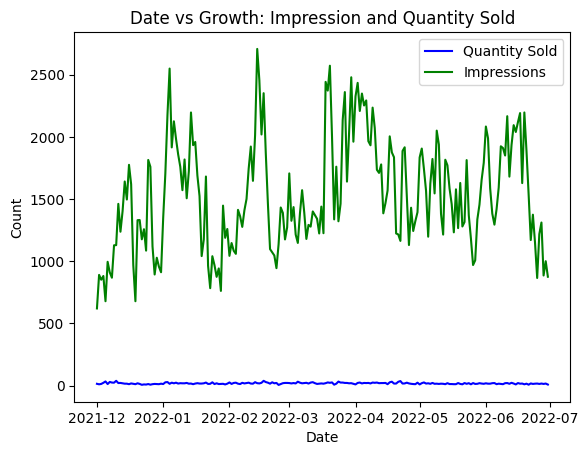

In [15]:
## Plot Quantity Vs Impressioms
plt.plot(product_clicks_impression['Day Index'], product_clicks_impression['Quantity'],color='blue', label='Quantity Sold')
plt.plot(product_clicks_impression['Day Index'], product_clicks_impression['Impressions'],color='green', label='Impressions')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Date vs Growth: Impression and Quantity Sold')
plt.legend()
plt.show()

In [16]:
## Ratio of quantity Vs clicks
ratio_quantity_per_clicks = [product_clicks_impression['Day Index'], product_clicks_impression['Quantity']/product_clicks_impression['Clicks']]
## Ratio of quantity Vs impressions
ratio_quantity_per_impressions = [product_clicks_impression['Day Index'], product_clicks_impression['Quantity']/product_clicks_impression['Impressions']]

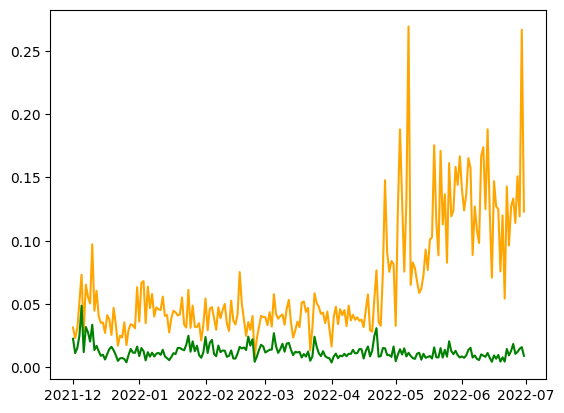

In [17]:
plt.plot(ratio_quantity_per_clicks[0], ratio_quantity_per_clicks[1], color = 'orange')
plt.plot(ratio_quantity_per_impressions[0], ratio_quantity_per_impressions[1], color = 'green')
plt.show()

In [22]:
div = [31,28,31,30,31,30,31,31,30,31,30,31]
data_avg_click_per_week = []
data_avg_click_per_month = []

data_avg_impression_per_week = []
data_avg_impression_per_month = []

week_click = 0
month_click = 0
week_impression = 0
month_impression = 0
check_month = 12
check_week = 48
for i in product_clicks_impression:
    date = pd.to_datetime(i[0], format='%y-%m-%d')
    if check_month != date.month:
        data_avg_click_per_month.append(check_month, month_click/div[check_month-1])
        data_avg_impression_per_month.append(check_month, month_impression/div[check_month-1])
        check_month = date.month
        month_click = i[2]
        month_impression = i[3]
    if check_week != date.isocalendar()[1]:
        data_avg_click_per_week.append(check_month, month_click/7)
        data_avg_impression_per_week.append(check_month, month_impression/7)
        check_week = date.isocalendar()[1]
        week_click = i[2]
        week_impression = i[3]
    else:
        month_click += i[2]
        month_impression += i[3]
        week_click += i[2]
        week_impression += i[3]

ValueError: time data "D" doesn't match format "%y-%m-%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [26]:
from datetime import datetime

div = [31,28,31,30,31,30,31,31,30,31,30,31]
data_avg_click_per_week = []
data_avg_click_per_month = []
data_avg_impression_per_week = []
data_avg_impression_per_month = []

week_click = 0
month_click = 0
week_impression = 0
month_impression = 0
check_month = 12
check_week = 48

for i, row in product_clicks_impression.iterrows():
    # date = datetime.strptime(str(i[0]), '%Y-%m-%d')
    date = pd.to_datetime(row[0], format='%Y-%m-%d')
    if check_month != date.month:
        data_avg_click_per_month.append((check_month, month_click/div[check_month-1]))
        data_avg_impression_per_month.append((check_month, month_impression/div[check_month-1]))
        check_month = date.month
        month_click = row[2]
        month_impression = row[3]
    if check_week != date.isocalendar()[1]:
        data_avg_click_per_week.append((check_week, week_click/7))
        data_avg_impression_per_week.append((check_week, week_impression/7))
        check_week = date.isocalendar()[1]
        week_click = row[2]
        week_impression = row[3]
    else:
        month_click += row[2]
        month_impression += row[3]
        week_click += row[2]
        week_impression += row[3]

# Handle the last month and last week
data_avg_click_per_month.append((check_month, month_click/div[check_month-1]))
data_avg_impression_per_month.append((check_month, month_impression/div[check_month-1]))
data_avg_click_per_week.append((check_week, week_click/7))
data_avg_impression_per_week.append((check_week, week_impression/7))

In [34]:
pd.DataFrame(data_avg_click_per_week)
pd.DataFrame(data_avg_impression_per_week)

,0,1
0,48,560.000000
1,49,1103.857143
2,50,1368.714286
3,51,1393.142857
4,52,1137.285714
5,1,2052.571429
6,2,1815.285714
7,3,1265.142857
8,4,1031.428571
9,5,1195.000000


In [36]:
plt.plot(data_avg_click_per_week['0'],data_avg_click_per_week['1'], label = 'Clicks')
plt.plot(data_avg_impression_per_week['0'], data_avg_impression_per_week['1'], label = 'Impressions')

plt.show()



TypeError: list indices must be integers or slices, not str

In [ ]:
plt.plot(data_avg_click_per_month[0], data_avg_click_per_month[1])
plt.plot(data_avg_impression_per_month[0],data_avg_impression_per_month[1])
plt.show()


